# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = "C:/Users/rachi/Downloads/token_spam_prob1.txt"
TOKEN_HAM_PROB_FILE = "C:/Users/rachi/Downloads/token_ham_prob1.txt"
TOKEN_ALL_PROB_FILE = "C:/Users/rachi/Downloads/token_all_prob1.txt"

TEST_FEATURE_MATRIX = 'C:/Users/rachi/Downloads/test-features1.txt'
TEST_TARGET_FILE = 'C:/Users/rachi/Downloads/test-target1.txt'

VOCAB_SIZE = 2500

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter = ' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = ' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter = ' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = ' ')

# Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

In [4]:
PROB_SPAM=0.2397827211588205

In [5]:
np.log(prob_token_spam)

array([-3.6412766 , -4.61935482, -5.21819132, ..., -9.13021433,
       -8.43706715, -9.13021433])

In [10]:
epsilon = 1e-9  # Small constant
prob_token_spam = np.where(prob_token_spam == 0, epsilon, prob_token_spam)
prob_all_tokens = np.where(prob_all_tokens == 0, epsilon, prob_all_tokens)

# Joint Probability in log format

In [11]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM) 

In [13]:
joint_log_spam[:5]

array([15.86323217,  5.1481391 ,  3.33688443, -5.23995165, 13.63409067])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [14]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

In [15]:
joint_log_ham[:5]

array([ 1.17363744, -5.79499092, -4.05481143,  1.26811952,  7.51308646])

In [16]:
joint_log_ham.size

1659

# Making Predictions 

## Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<br>

 <center> OR </center>

<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [17]:
prediction=joint_log_spam > joint_log_ham

In [18]:
prediction[-5:]*1

array([0, 0, 0, 1, 0])

In [19]:
y_test[-5:]

array([1., 0., 0., 1., 1.])

## Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠ \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [20]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM) 
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [21]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly:', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly:', numdocs_wrong)

Docs classified correctly: 1316
Docs classified incorrectly: 343


In [22]:
# Accuracy

correct_docs/len(X_test)

np.float64(0.7932489451476793)

In [23]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 20.68%
Accuracy of the model is 79.32%


# Visualizing the Results

In [24]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

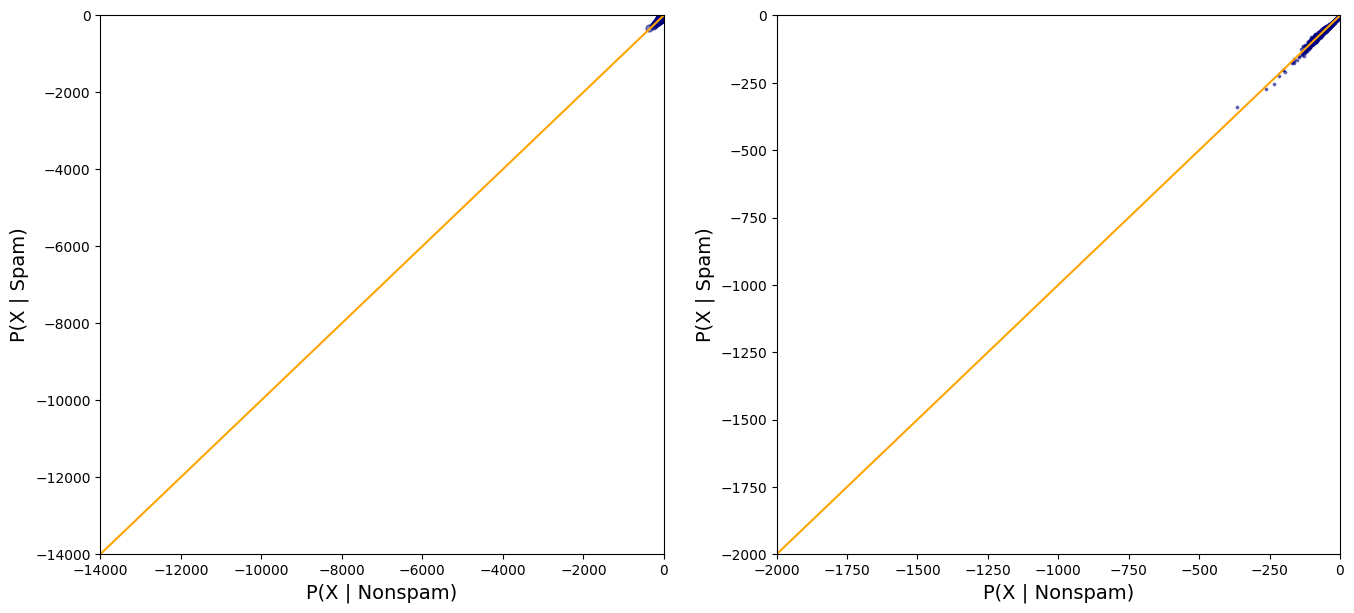

In [25]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)
plt.figure(figsize=(16,7))

#Chart Number 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

# Set Scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color = 'navy', alpha = 0.5, s = 25)
plt.plot(linedata, linedata, color = 'orange')

# Chart Number 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

# Set Scale
plt.xlim([-2000,1])
plt.ylim([-2000,1])


plt.scatter(joint_log_ham, joint_log_spam, color = 'navy', alpha = 0.5, s = 3)
plt.plot(linedata, linedata, color = 'orange')


plt.show()

In [26]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

<module 'seaborn' from 'C:\\Users\\rachi\\AppData\\Roaming\\Python\\Python312\\site-packages\\seaborn\\__init__.py'>

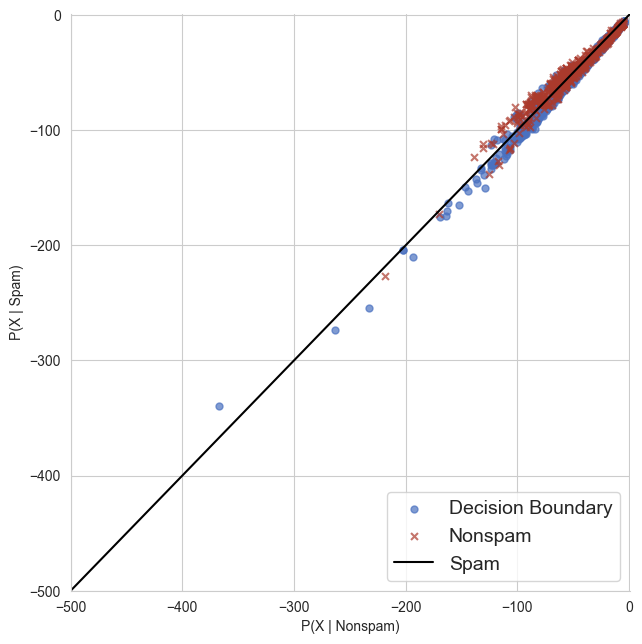

In [27]:
my_colors = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height = 6.5, fit_reg = False, legend = False, scatter_kws={'alpha':0.7, 's':25}, hue = labels, markers = ['o','x'], palette = my_colors)

plt.xlim([-500,1])
plt.ylim([-500,1])

plt.plot(linedata, linedata, color = 'black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

sns

# False Positives and False Negatives

In [28]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1398,  261]))

In [29]:
true_pos = (y_test == 1) & (prediction == 1)
true_pos.sum()

np.int64(175)

In [30]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

np.int64(86)

In [31]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

np.int64(257)

# Recall Score

In [32]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 40.51%


# Precision Score

In [33]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.67


# F-Score or F1 Score

In [34]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.51
